# 다양한 OCR 모델 비교하기

### 들어가며

문자를 읽는 기술인 OCR(Optical Character Recognition, 광학 문자 인식)은 산업적으로 매우 유용한 기술이다. 딥러닝이 도입된 이후 OCR 기술이 획기적으로 개선되어 많은 산업 도메인에 유용하게 사용될 수 있는 가능성이 열리고 있다.

- [4차 산업 고도화의 '촉매'가 되는 OCR](https://blog.naver.com/kpostbank/221343765011)

### 다양한 OCR 기술 활용 사례

- 우편번호 추출을 통한 우편물 관리
- 자동차 번호판 인식
- 모바일 기기를 사용한 명함 인식
- 신용카드 읽기를 이용한 결제 서비스
- 컨테이너 일련번호 인식을 이용한 스마트 선박 시스템

### 어떤 과정으로 읽을까?

- 먼저 입력받은 사진 속에서 문자의 위치를 찾아낸다. 이 과정을 **Text Detection(문자검출)** 이라고 한다. 찾은 문자 영역으로부터 문자를 읽어내는 것은 **Text Recognition(문자인식)** 이다. 
- 예를 들어 아래 카카오의 OCR 모델은 먼저 문자가 있는 영역의 정보 (`coord`, `Text Recognition`)를 찾아내고, 각 영역에서 문자를 인식하고 있다.
- 이렇게 문자 인식 모델은 Text Detection과 Recognition 두 과정을 통해서 사진 속의 문자를 읽을 수 있게 된다.

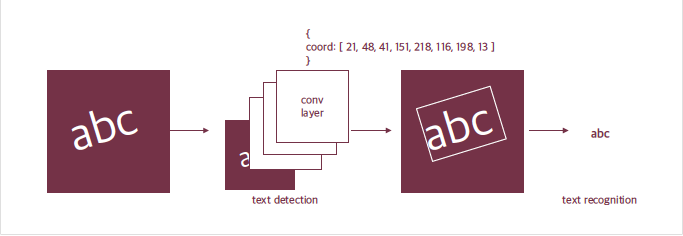
[출처: https://brunch.co.kr/@kakao-it/318]


- 위 그림에서는 문자의 영역을 표현하는 방법으로 사각형의 네 꼭짓점 좌표를 알려 주는 방법을 제시하고 있다. 하지만 다른 도형이나 표현 방법을 사용할 수도 있을 것이다.
- 축에 정렬된 사각형인 Bounding box 그리고 돌아간 사각형 Oriented bounding box, 자유로운 사각형은 Quadrangle 그리고 다각형인 Polygon, Pixel 수준으로 영역을 표현한 Mask 등이런 방법을 연구한 많은 논문들 중 하나를 소개합니다.

- [Scene Text Detection with Polygon Offsetting and Border Augmentation](https://www.mdpi.com/2079-9292/9/1/117/pdf)

### 사진 속 문자 찾아내기 - detection


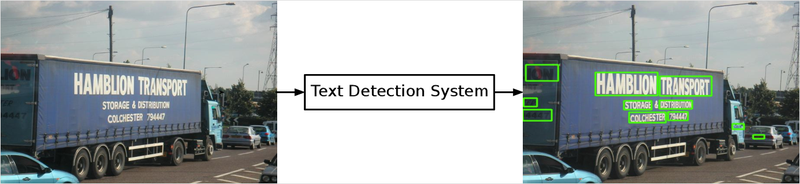
[출처: https://www.semanticscholar.org/paper/End-To-End-Text-Detection-Using-Deep-Learning-Ibrahim/6d8584a900bd77afec55921c2d2d1cb6f1244b25/figure/0]


사진 속 문자를 찾아내는 최근의 딥러닝 모델은 일반적인 Object Detection(객체 인식) 방법으로 접근한다. 이미지 속에서 물체를 찾아내는 딥러닝 모델에게 문자를 찾도록 학습을 시킨 것이다. 물론 문자의 특성에 따라서 모델을 변경해 주기도 한다.

딥러닝 기반 객체 검출 방법에는 Regression(회귀) 방식이나 Segmentation(세그멘테이션) 방식이 있다. 
- `Regression`은 기준으로 하는 박스 대비 문자의 박스가 얼마나 차이가 나는지를 학습한다. 
- `Segmentation`은 픽셀 단위로 해당 픽셀이 문자를 표현하는지를 분류하는 문제(pixel-wise classification)라고 볼 수 있다.

- [딥러닝을 활용한 객체 탐지 알고리즘 이해하기](https://blogs.sas.com/content/saskorea/2018/12/21/%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84-%ED%99%9C%EC%9A%A9%ED%95%9C-%EA%B0%9D%EC%B2%B4-%ED%83%90%EC%A7%80-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0/)

### 사진 속 문자 읽어내기 - recognition

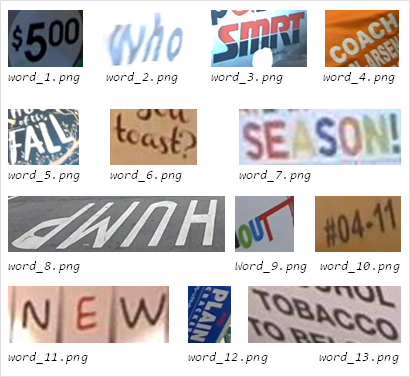
[출처: ICDAR (https://rrc.cvc.uab.es/?ch=4&com=tasks)]


문자 인식은 사진 속에서 문자를 검출해 내는 검출 모델이 영역을 잘라서 주면 그 영역에 어떤 글자가 포함되어 있는지 읽어내는 과정이다. 아래는 ICDAR15라는 OCR 데이터셋에서 단어 단위로 잘린 이미지이다. 문자 인식 모델은 이렇게 작게 잘린 이미지가 들어오면 이미지 속에 어떤 단어가 포함됐는지 찾아내는 것이다.

사실 이 과정은 이미지 문제보다는 자연어 처리에서 많은 영감을 받았다. 이미지 내의 문자 인식 모델의 기본적인 방법 중 하나가 바로 CNN과 RNN을 결합한 CRNN 모델이다. 이미지 내의 텍스트와 연관된 특징을 CNN을 통해 추출한 후에 스텝 단위의 문자 정보를 RNN으로 인식하는 것이다.

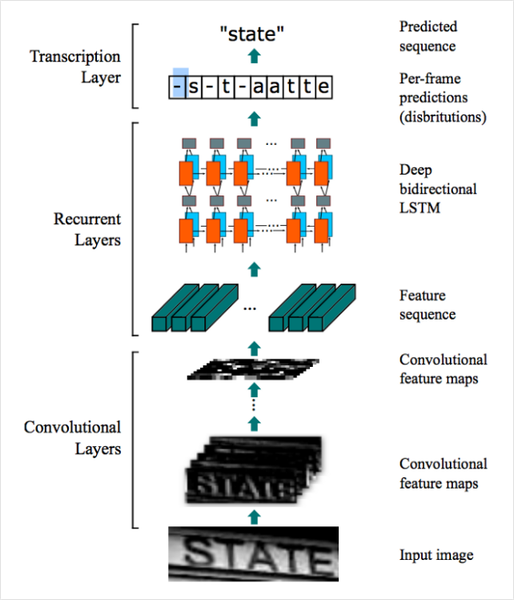
[출처: Ibrahim, Ahmed Sobhy Elnady. End-To-End Text Detection Using Deep Learning. Diss. Virginia Tech, 2017. (https://arxiv.org/abs/1507.05717)]


이렇게 검출 결과로부터 인식 모델을 통해 문자를 인식하고 나면 구글 API의 결과처럼 사진 속 영역에 표시를 하고 그 영역에 어떤 문자가 적혀있는지 알 수 있는 OCR 시스템이 된다.

In [1]:
import keras_ocr
import pytesseract

# from google.cloud import vision
import io, os
import matplotlib.pyplot as plt

from PIL import Image
from pytesseract import Output

In [2]:
print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr


0.8.8
0.3.8


### Step1. 검증용 데이터셋 준비
___

- Lenovo 노트북, 데스트탑 판매 이미지와 아이폰, 아이패드, 맥북프로 판매 이미지 load
- 검증용 이미지 경로 지정

In [3]:
# 이미지 경로를 불러온 다음, list에 담아줍니다. 
img_path = os.getenv('HOME')+'/aiffel/ocr_python/img/'
img_list = os.listdir(img_path)

img_list

['motorola.png',
 'macbookpro.png',
 'legion7_2.png',
 'iphone13pro.png',
 'legion7_1.png',
 'ipadpro.png']

### Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
___

### keras-ocr

- `keras-ocr`은 텐서플로우의 케라스 API를 기반으로 이미지 속 문자를 읽는 End-to-End OCR을 할 수 있게 해준다. 
- 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용한다.

- `keras_ocr.pipeline.Pipeline()` 는 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러오게 된다. 검출기와 인식기를 위한 가중치 하나씩을 불러온다.

- [keras_ocr 공식문서](https://keras-ocr.readthedocs.io/en/latest/index.html)

In [4]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


만들어둔 파이프라인의 `recognize()` 에 이미지를 몇 개 넣어준다.  
이미지 소스의 url을 사용. 이미지는 https://unsplash.com/s/photos/text 에서 가져왔다.

In [5]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
  'https://source.unsplash.com/M7mu6jXlcns/640x460',
  'https://source.unsplash.com/6jsp4iHc8hI/640x460',
  'https://source.unsplash.com/98uYQ-KupiE',
  'https://source.unsplash.com/j9JoYpaJH3A',
  'https://source.unsplash.com/eBkEJ9cH5b4'
]

images = [keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

인식된 결과를 pyplot으로 시각화를 해보자.

사용법은 내부적으로 `recognize()` 는 검출기와 인식기를 두고, 검출기로 바운딩 박스(bounding box, 문자가 있는 영역을 표시한 정보)를 검출한 뒤, 인식기가 각 박스로부터 문자를 인식하는 과정을 거치도록 한다.

- [keras-ocr 파이프라인](https://github.com/faustomorales/keras-ocr/blob/master/keras_ocr/pipeline.py)


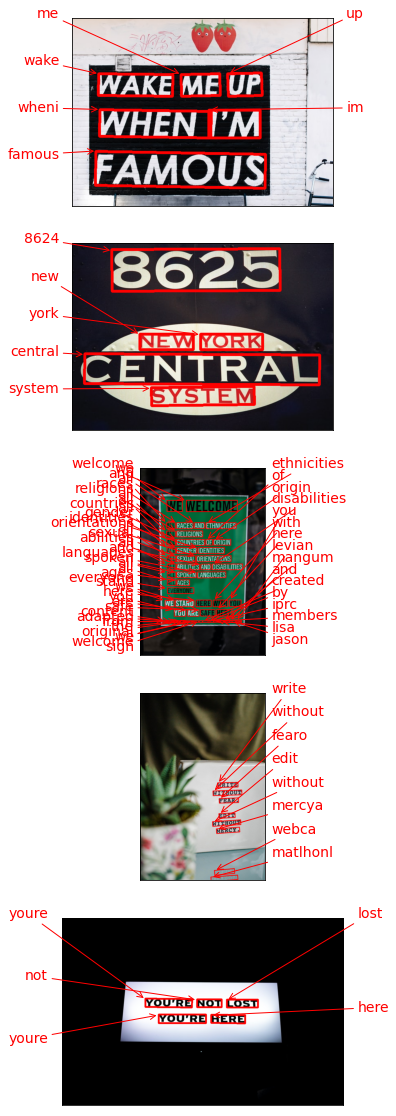

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

- 위에서 준비한 데이터 셋으로 다시 해보자.

In [7]:
images = [keras_ocr.tools.read(os.path.join(img_path, img)) for img in img_list]
predictions = [pipeline.recognize([os.path.join(img_path, img)]) for img in img_list]

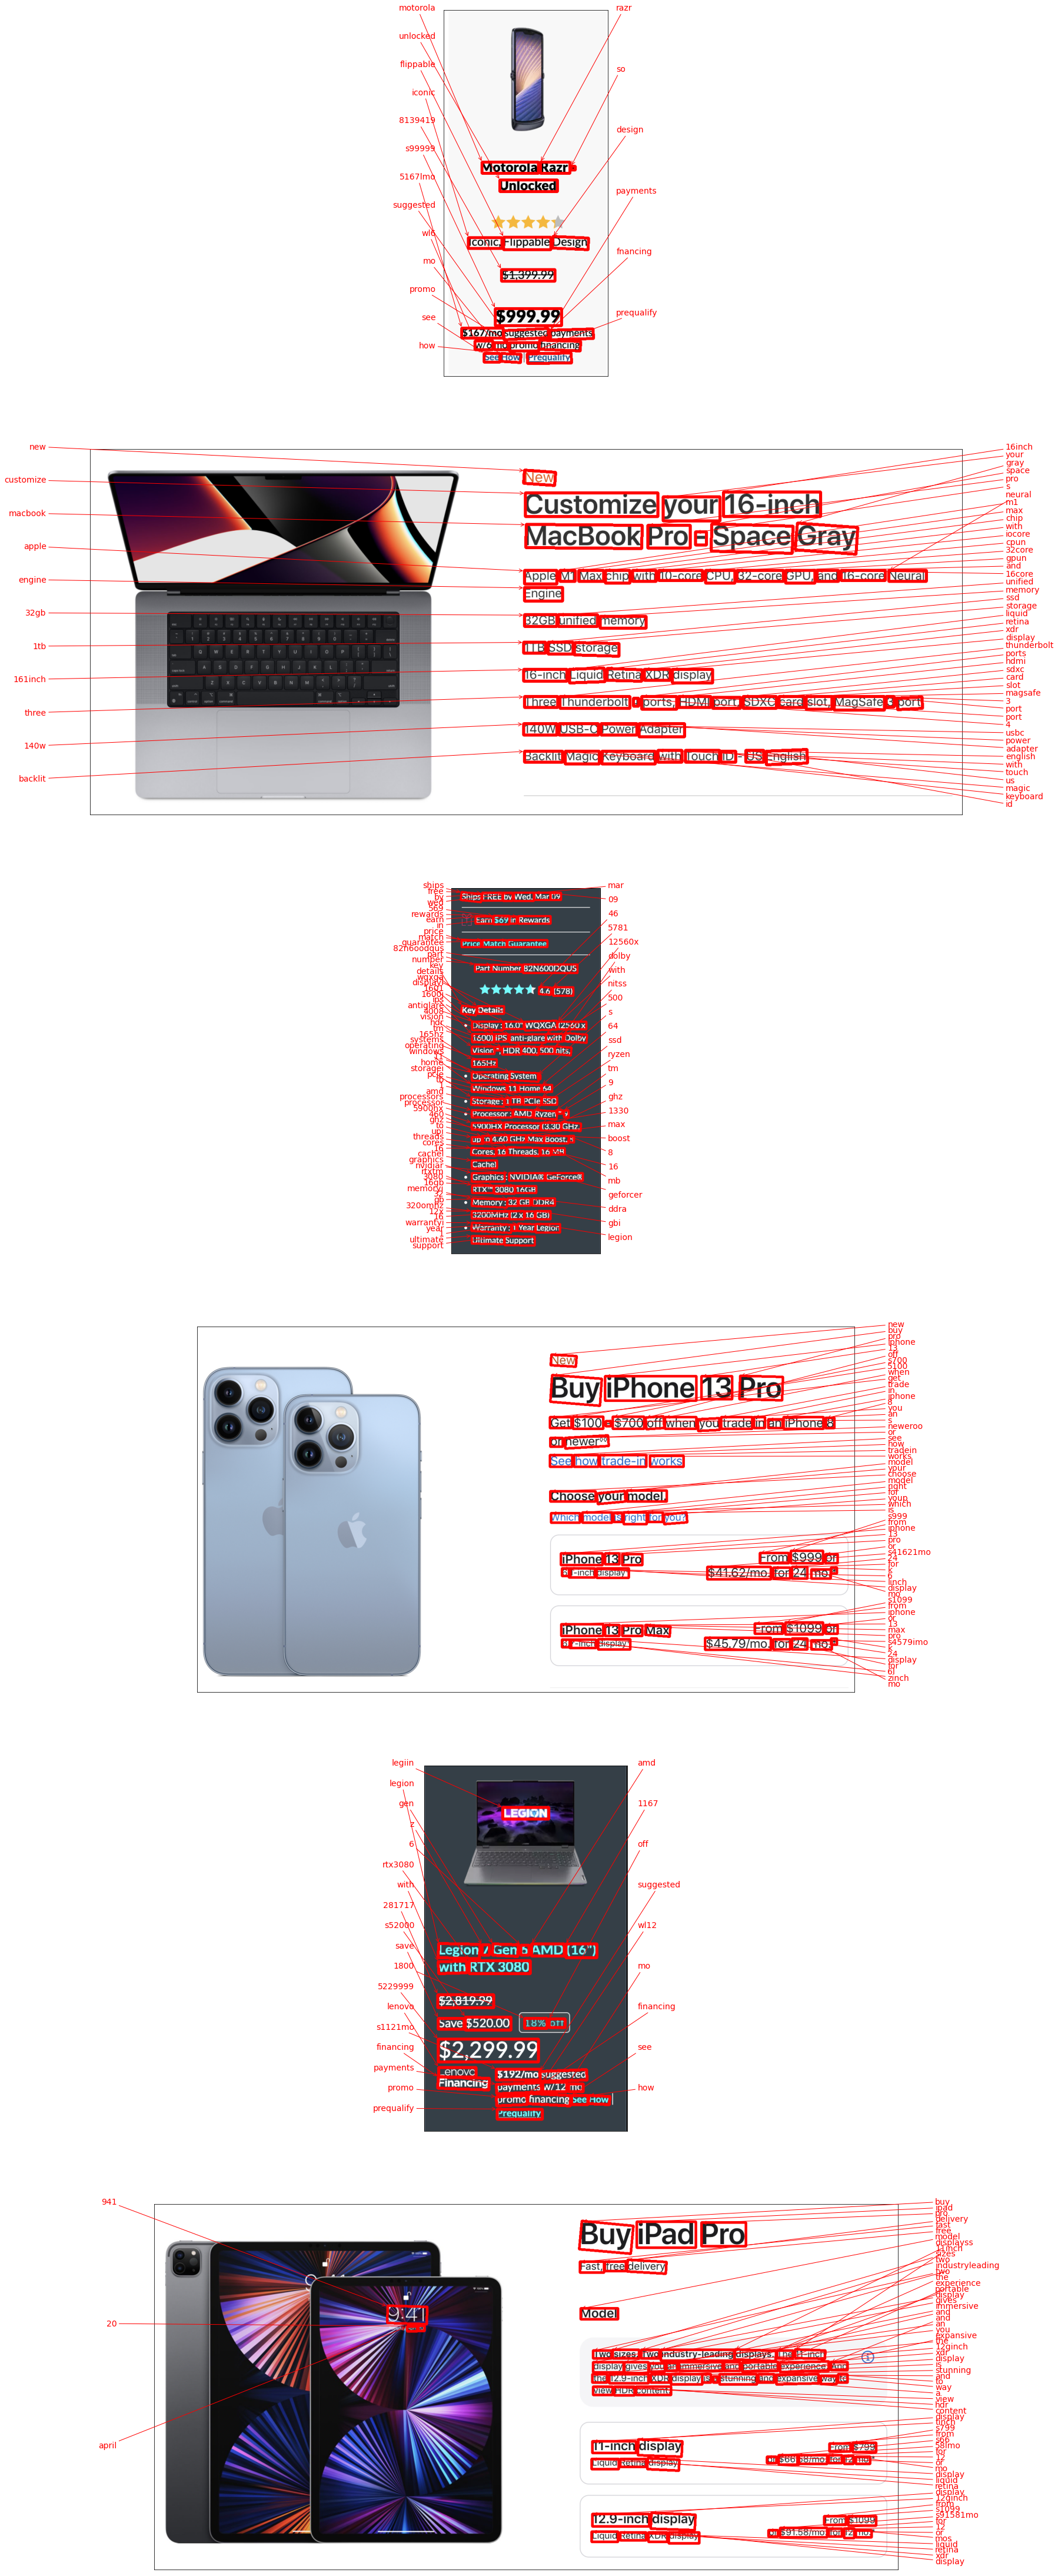

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(80, 80))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=predictions[idx][0], ax=ax)

- 꽤나 잘 인식되는 것 같다.
- 하지만 특수문자 `(%, $, 괄호)` 등은 인식율이 낮은것을 확인할 수 있었다. 


### 테서랙트

- 테서랙트(Tesseract) 라이브러리로 이미지에서 문자를 인식해 보자.
- 테서랙트는 구글에서 후원하는 OCR 오픈소스 라이브러리로 현재는 버전 4와 Tesseract.js등으로 확장되는 등 많은 곳에서 사용되고 있다. 
- 버전 4에서는 LSTM이 엔진에 추가되었고 현재 한국어를 포함한 116 개 국어를 지원하고 있다.


### 테서랙트로 문자 검출하고 이미지 자르기 (detection)
___


In [9]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/img'
img_file_path = work_dir + '/motorola.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/img/0000.png
/aiffel/aiffel/ocr_python/img/0001.png
/aiffel/aiffel/ocr_python/img/0002.png
/aiffel/aiffel/ocr_python/img/0003.png
/aiffel/aiffel/ocr_python/img/0004.png
/aiffel/aiffel/ocr_python/img/0005.png
/aiffel/aiffel/ocr_python/img/0006.png
/aiffel/aiffel/ocr_python/img/0007.png
/aiffel/aiffel/ocr_python/img/0008.png
/aiffel/aiffel/ocr_python/img/0009.png
/aiffel/aiffel/ocr_python/img/0010.png
/aiffel/aiffel/ocr_python/img/0011.png
/aiffel/aiffel/ocr_python/img/0012.png
/aiffel/aiffel/ocr_python/img/0013.png
/aiffel/aiffel/ocr_python/img/0014.png
/aiffel/aiffel/ocr_python/img/0015.png
/aiffel/aiffel/ocr_python/img/0016.png
/aiffel/aiffel/ocr_python/img/0017.png
/aiffel/aiffel/ocr_python/img/0018.png
/aiffel/aiffel/ocr_python/img/0019.png
/aiffel/aiffel/ocr_python/img/0020.png
/aiffel/aiffel/ocr_python/img/0021.png


- 위 `crop_word_regions()` 함수는 테스트 이미지를 받아서, 문자 검출을 진행한 후, 검출된 문자 영역을 crop한 이미지로 만들어 그 파일들의 list를 리턴하는 함수이다.

- 기본적으로 `pytesseract.image_to_data()` 를 사용한다. 파이썬에서 편하게 사용하기 위해서 `pytesseract` 의 `Output` 을 사용해서 결괏값의 형식을 딕셔너리(`DICT`) 형식으로 설정해 주게 된다.
- 이렇게 인식된 결과는 바운딩 박스의 left, top, width, height 정보를 가지게 된다. 바운딩 박스를 사용해 이미지의 문자 영역들을 파이썬 `PIL(pillow)` 또는 `opencv` 라이브러리를 사용해 잘라(crop)서 `cropped_image_path_list`에 담아 리턴하였다.

### 테서랙트로 잘린 이미지에서 단어 인식하기
___

검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나오는 `image_to_string()`를 사용하게 된다.

이렇게 인식된 결과가 실제 이미지와 맞는지 확인해 보자.

In [10]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)


Motorola

Raz7r

a

Uniockea

. @ 6 6 @

iconic,

Flippabie

Design

$4399-99

$999.99

$167/mo

suggested

payments

w/6

gale

) prom

) financing

See

How


Prequalify

Done


In [11]:
img_file_path1 = work_dir + '/iphone13pro.png'    

cropped_image_path_list = crop_word_regions(img_file_path1, work_dir)

recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/img/0000.png
/aiffel/aiffel/ocr_python/img/0001.png
/aiffel/aiffel/ocr_python/img/0002.png
/aiffel/aiffel/ocr_python/img/0003.png
/aiffel/aiffel/ocr_python/img/0004.png
/aiffel/aiffel/ocr_python/img/0005.png
/aiffel/aiffel/ocr_python/img/0006.png
/aiffel/aiffel/ocr_python/img/0007.png
/aiffel/aiffel/ocr_python/img/0008.png
/aiffel/aiffel/ocr_python/img/0009.png
/aiffel/aiffel/ocr_python/img/0010.png
/aiffel/aiffel/ocr_python/img/0011.png
/aiffel/aiffel/ocr_python/img/0012.png
/aiffel/aiffel/ocr_python/img/0013.png
/aiffel/aiffel/ocr_python/img/0014.png
/aiffel/aiffel/ocr_python/img/0015.png
/aiffel/aiffel/ocr_python/img/0016.png
/aiffel/aiffel/ocr_python/img/0017.png
/aiffel/aiffel/ocr_python/img/0018.png
/aiffel/aiffel/ocr_python/img/0019.png
/aiffel/aiffel/ocr_python/img/0020.png
/aiffel/aiffel/ocr_python/img/0021.png
/aiffel/aiffel/ocr_python/img/0022.png
/aiffel/aiffel/ocr_python/img/0023.png
/aiffel/aiffel/ocr_python/img/0024.png
/aiffel/aiffel/ocr_python

In [12]:
img_file_path2 = work_dir + '/macbookpro.png'    

cropped_image_path_list = crop_word_regions(img_file_path2, work_dir)

recognize_images(cropped_image_path_list)

/aiffel/aiffel/ocr_python/img/0000.png
/aiffel/aiffel/ocr_python/img/0001.png
/aiffel/aiffel/ocr_python/img/0002.png
/aiffel/aiffel/ocr_python/img/0003.png
/aiffel/aiffel/ocr_python/img/0004.png
/aiffel/aiffel/ocr_python/img/0005.png
/aiffel/aiffel/ocr_python/img/0006.png
/aiffel/aiffel/ocr_python/img/0007.png
/aiffel/aiffel/ocr_python/img/0008.png
/aiffel/aiffel/ocr_python/img/0009.png
/aiffel/aiffel/ocr_python/img/0010.png
/aiffel/aiffel/ocr_python/img/0011.png
/aiffel/aiffel/ocr_python/img/0012.png
/aiffel/aiffel/ocr_python/img/0013.png
/aiffel/aiffel/ocr_python/img/0014.png
/aiffel/aiffel/ocr_python/img/0015.png
/aiffel/aiffel/ocr_python/img/0016.png
/aiffel/aiffel/ocr_python/img/0017.png
/aiffel/aiffel/ocr_python/img/0018.png
/aiffel/aiffel/ocr_python/img/0019.png
/aiffel/aiffel/ocr_python/img/0020.png
/aiffel/aiffel/ocr_python/img/0021.png
/aiffel/aiffel/ocr_python/img/0022.png
/aiffel/aiffel/ocr_python/img/0023.png
/aiffel/aiffel/ocr_python/img/0024.png
/aiffel/aiffel/ocr_python

### Step3. 테스트 결과 정리
___


### 3-1. keras-ocr

In [13]:
def show_keras(num):
    keras_ocr.tools.drawAnnotations(image=images[num], predictions=predictions[num][0])

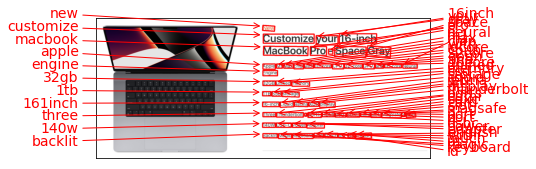

In [14]:
show_keras(1)

- 텍스트가 너무 많은 이미지를 했더니 우측은 잘 구분되지 않지만
- 좌측 텍스트는 제법 잘 인식한 것 같다.

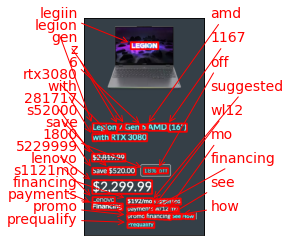

In [15]:
show_keras(4)

- 위 이미지는 대부분 잘 보이고 인식도 되는 것 같지만 금액 부위는 인식율이 떨어지는 것으로 보인다.

### 3-2. Tesseract

- 전반적으로 keras-ocr에 비해 인식률이 나빴다.
- 이미지 리스트 정리하여 출력한 결과를 보고 싶었으나 역량 부족으로 차후로 미루었다.

### Step4. 결과 분석과 결론 제시
___


- 구글 OCR을 시도해 보진 않았지만 전반적으로 구글 OCR이 띄어쓰기도 가장 잘 잡아내고 대소문자까지 구분한다는 점에서 나머지 두 OCR에 비해 성능이 좋다는 것을 알 수 있다. 그 뿐만 아니라, 대체적으로 정확하게 글씨를 잡아내는 것으로 파악되었다. 

- keras-ocr은 모든 문자를 소문자로 인식하지만, 이는 큰 문제가 되지 않는다. 하지만, 대체적으로 정확도가 많이 떨어졌고 $, &와 같은 특수문자를 아예 인식하지 못하는 거였으면 차라리 다행이었겠지만 다른 알파벳으로 인식한다는 점도 정확도를 낮추는 요인이 되었다.

- tesseract는 정확도를 논하기 민망할 정도로 거의 대부분 단어들을 인식하지 못하였고, 심지어 가끔씩은 단어가 있는 부분의 frame조차 제대로 잡아주지 못했다. tesseract는 아직 상용화와 거리가 많이 멀어보인다.

## 회고

- 구글 OCR은 시도해 보고 싶었으나 추후 기회가 된다면 도전해 보고 싶다.(신규 등록 및 카드 등록 등이 거슬렸다.)
- 다양한 시도를 해보고 싶었지만 내용 파악 및 관심도가 많이 떨어져서 집중하기가 힘들었다.
- 생각보다 호기심을 자극하거나 관심을 끌만한 신선함이 떨어져서 그랬던 것 같다.